# LSTM architecture comparison

This notebook discusses predictions made using a selection of different LSTM architectures, primarily hidden layer sizes. The minimal model *A* is used, with four input features and one output target.

In general, the model architecture has the following effect on model performance:
- Too few neurons or layers may make the model incapable of discovering nonlinear and/or  deep patterns within the dataset, and thus underfit
- Too many neurons or layers may make the model discover underlying patterns that are complex, but not relevant to the problem, and thus overfit.

Finding the optimal model architecture and model hyperparameters generally requires extensive trial and error, e.g. in the form of a grid search. For this comparison, some hyperparameters known to work well on the relevant datasets are chosen (i.e. the library defaults).

Dataset *G* is used because this dataset offers the largest amount of data samples and thus is assumed most appropriate for LSTM models.

## Step 0: Import modules

In [1]:
# %load lstm_comparison.py
import src.core as mlApi
import src.core_configs as configs

Using TensorFlow backend.


## Step 1: Implement required methods

A method is implemented to perform initialization, training and predictions for a model. These are all functions of the high-level API, and thus nothing out of the ordinary. The function is simply implemented for simplification of the following code.

In [2]:
def initTrainPredict(modelList, retrain=False, plot=True, score=True):
    mlApi.initModels(modelList)
    mlApi.trainModels(retrain)
    modelNames, metrics_train, metrics_test, columnsList, deviationsList = mlApi.predictWithModels(
        plot=plot,
        score=score,
    )

## Step 2: Define dataset specifics

In [3]:
filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfig('G', 'C', '10min')

## Step 3: Initiate and divide data

In [4]:
df = mlApi.initDataframe(filename, columns, irrelevantColumns)
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
X_train, y_train, X_test, y_test = mlApi.getFeatureTargetSplit(targetColumns)

Columns before removal: 
Col. 0 : PDI0064 - Process Pressure Difference
Col. 1 : TI0066 - Process Outlet Temperature
Col. 2 : TZI0012 - Process Inlet Temperature
Col. 3 : FI0010 - Process Flow Rate
Col. 4 : TT0025 - Coolant Inlet Temperature
Col. 5 : TT0026 - Coolant Outlet Temperature
Col. 6 : PI0001 - Coolant Inlet Pressure
Col. 7 : FI0027 - Coolant Flow Rate
Col. 8 : TIC0022U - Coolant Valve Opening
Col. 9 : PDT0024 - Coolant Pressure Difference

Columns after removal: 
Col. 0 : PDI0064 - Process Pressure Difference
Col. 1 : TI0066 - Process Outlet Temperature
Col. 2 : TZI0012 - Process Inlet Temperature
Col. 3 : FI0010 - Process Flow Rate
Col. 4 : TT0025 - Coolant Inlet Temperature
Col. 5 : TT0026 - Coolant Outlet Temperature

Finding data between 2019-04-10 00:00:00 and 2019-08-01 00:00:00
Found 13885 rows

Finding data between 2017-01-01 00:00:00 and 2020-03-01 00:00:00
Found 146747 rows



## Step 4: Define models

In [5]:
lstm_1x_128 = mlApi.LSTM('lstm 1x 128', layers=[128], enrolWindow=16)

lstmd_1x_16 = mlApi.LSTM('lstmd 1x 16', layers=[16], dropout=0.3, enrolWindow=16)
lstmd_1x_32 = mlApi.LSTM('lstmd 1x 32', layers=[32], dropout=0.3, enrolWindow=16)
lstmd_1x_64 = mlApi.LSTM('lstmd 1x 64', layers=[64], dropout=0.3, enrolWindow=16)
lstmd_1x_128 = mlApi.LSTM('lstmd 1x 128', layers=[128], dropout=0.3, enrolWindow=16)

lstmd_2x_16 = mlApi.LSTM('lstmd 2x 16', layers=[16, 16], dropout=0.3, enrolWindow=16)
lstmd_2x_32 = mlApi.LSTM('lstmd 2x 32', layers=[32, 32], dropout=0.3, enrolWindow=16)
lstmd_2x_64 = mlApi.LSTM('lstmd 2x 64', layers=[64, 64], dropout=0.3, enrolWindow=16)
lstmd_2x_128 = mlApi.LSTM('lstmd 2x 128', layers=[128, 128], dropout=0.3, enrolWindow=16)

linear_cv = mlApi.Linear_Regularized('linear r')

mlp_d = mlApi.MLP('mlp for ensemble 2x 64', layers=[64, 64], dropout=0.2)

ensemble = mlApi.Ensemble('lstmd + linear', [lstmd_2x_64, linear_cv])
ensemble2 = mlApi.Ensemble('lstmd2 + linear', [lstmd_1x_128, linear_cv])
ensemble3 = mlApi.Ensemble('lstm + mlp', [lstmd_2x_64, mlp_d])

## Step 5: Make predictions

Predictions are made in bulks in order to enhance plot readability. The following bulks are discussed invidually: 
1. First, the simplest model architectures with fewest neurons per layer
2. Then, the more complex model architectures
3. Finally, the ensemble models

### Simplest models

Training model linear r
    Trained weights for linear r:
[[ 0.40514293 -0.0798533  -0.56135528 -0.35160217]
 [ 0.17121011  0.26264951  0.72230129  0.22615566]]
Model lstmd 1x 16 was loaded from file
Model lstmd 1x 32 was loaded from file
Model lstmd 2x 16 was loaded from file
Model lstmd 2x 32 was loaded from file
+-------------+-----------+-------------+---------------+--------+
|    Model    | Min. loss | Chosen loss | Min. val loss | Epochs |
+-------------+-----------+-------------+---------------+--------+
| lstmd 1x 16 |  0.04189  |   0.048115  |    0.290245   |  284   |
| lstmd 1x 32 |  0.030425 |   0.045124  |    0.288125   |  164   |
| lstmd 2x 16 |  0.039979 |   0.054809  |    0.316328   |  195   |
| lstmd 2x 32 |  0.014902 |   0.036102  |    0.27723    |  162   |
+-------------+-----------+-------------+---------------+--------+


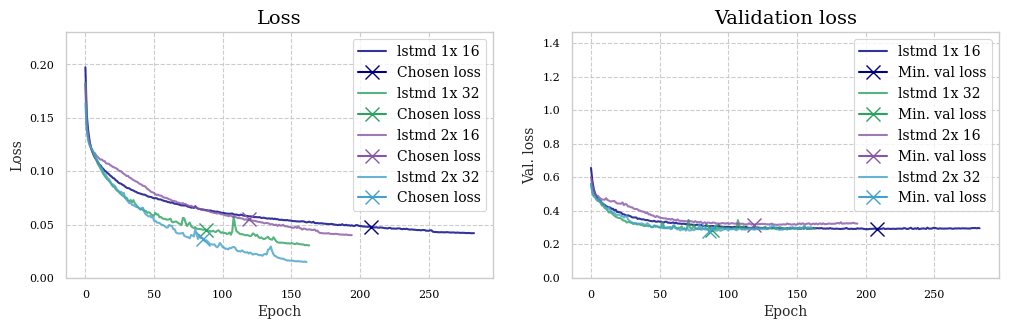

Model prediction scores
+-------------+-------------+------------+
|    Model    | Train score | Test score |
+-------------+-------------+------------+
|   linear r  |    0.4405   |  -0.9779   |
| lstmd 1x 16 |    0.7157   |  -0.7779   |
| lstmd 1x 32 |    0.6103   |  -1.1579   |
| lstmd 2x 16 |    0.6962   |  -1.0544   |
| lstmd 2x 32 |    0.5682   |  -0.7423   |
+-------------+-------------+------------+


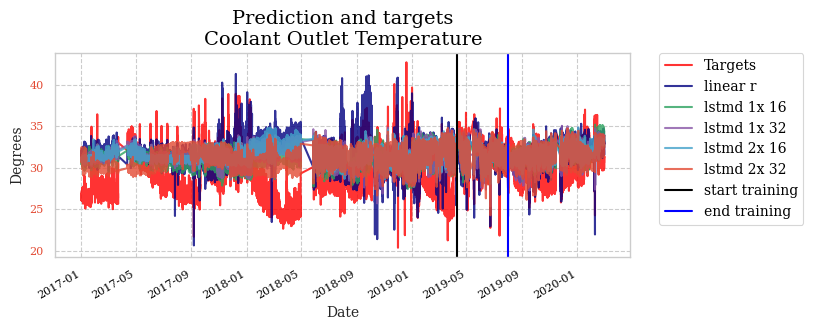

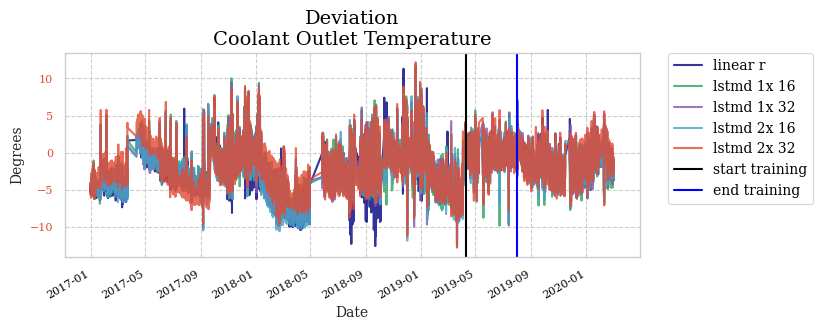

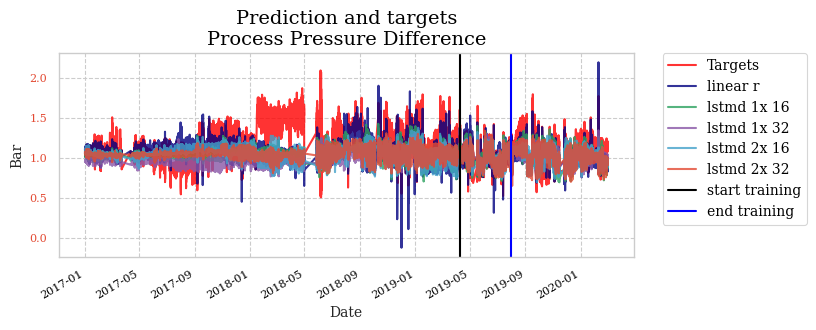

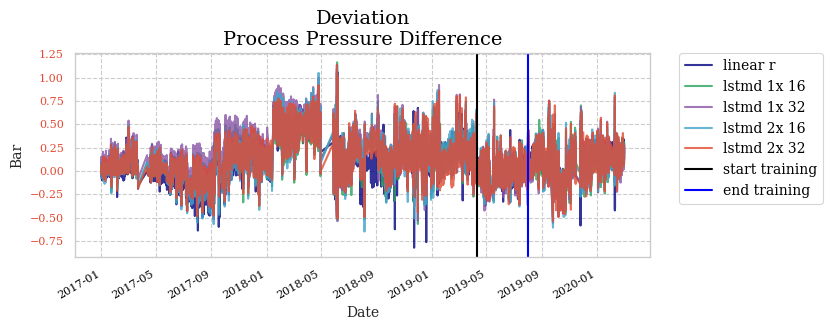

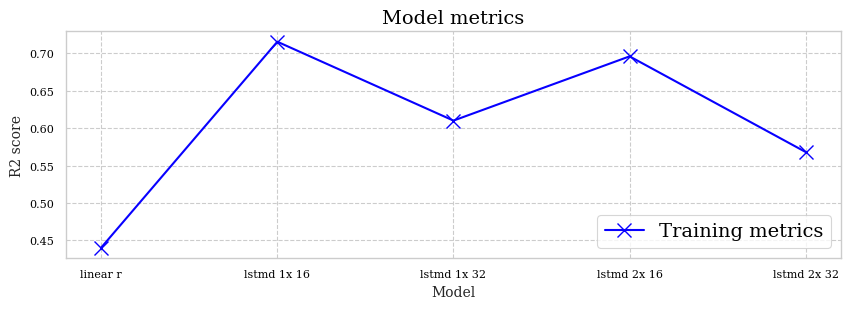

In [6]:
modelList = [
    linear_cv,
    lstmd_1x_16,
    lstmd_1x_32,
    lstmd_2x_16,
    lstmd_2x_32,
]

initTrainPredict(modelList)

### More complex models

Training model linear r
    Trained weights for linear r:
[[ 0.40514293 -0.0798533  -0.56135528 -0.35160217]
 [ 0.17121011  0.26264951  0.72230129  0.22615566]]
Model lstmd 1x 64 was loaded from file
Model lstmd 1x 128 was loaded from file
Model lstmd 2x 64 was loaded from file
Model lstmd 2x 128 was loaded from file
+--------------+-----------+-------------+---------------+--------+
|    Model     | Min. loss | Chosen loss | Min. val loss | Epochs |
+--------------+-----------+-------------+---------------+--------+
| lstmd 1x 64  |  0.009388 |   0.02772   |    0.261556   |  141   |
| lstmd 1x 128 |  0.001682 |   0.025673  |    0.251836   |   80   |
| lstmd 2x 64  |  0.002677 |   0.024856  |    0.25868    |   80   |
| lstmd 2x 128 |  0.000363 |   0.028581  |    0.249653   |  105   |
+--------------+-----------+-------------+---------------+--------+


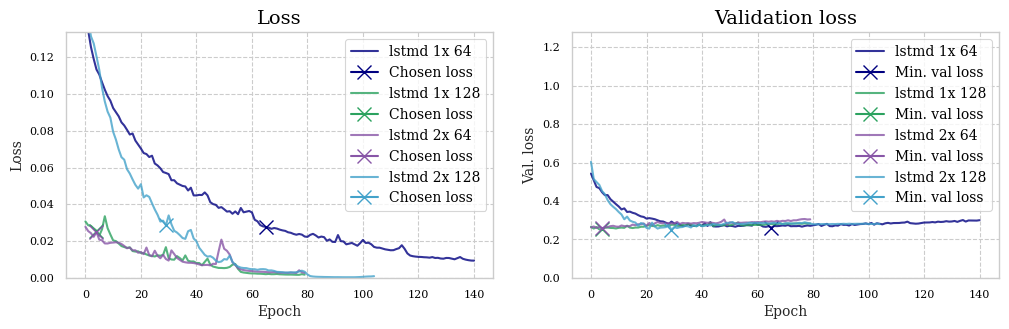

Model prediction scores
+--------------+-------------+------------+
|    Model     | Train score | Test score |
+--------------+-------------+------------+
|   linear r   |    0.4405   |  -0.9779   |
| lstmd 1x 64  |    0.603    |  -1.6819   |
| lstmd 1x 128 |    0.617    |  -0.9476   |
| lstmd 2x 64  |    0.6133   |  -0.7869   |
| lstmd 2x 128 |    0.6897   |  -0.9184   |
+--------------+-------------+------------+


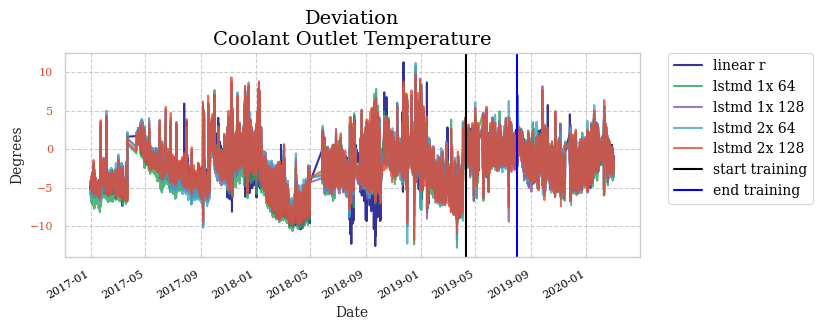

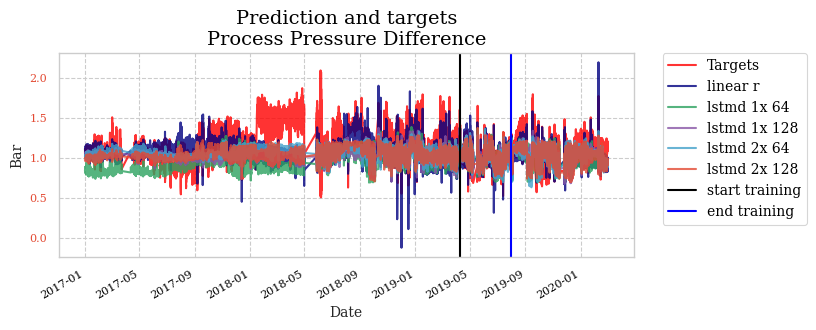

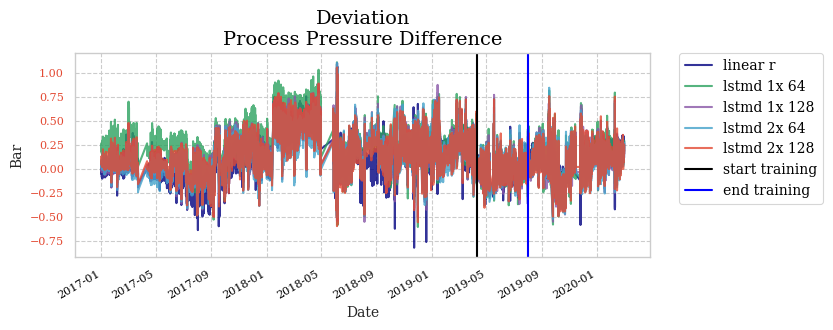

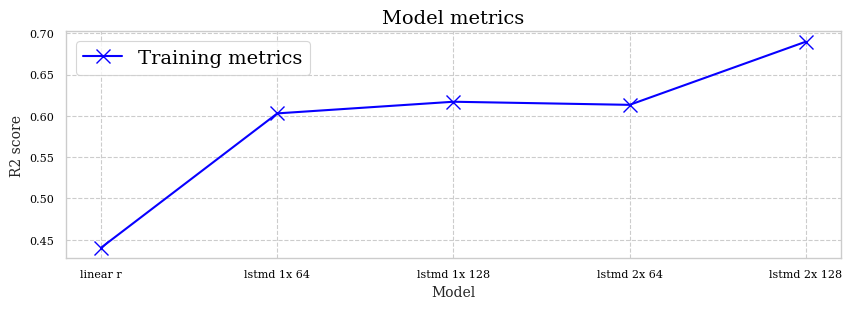

In [7]:
modelList = [
    linear_cv,
    lstmd_1x_64,
    lstmd_1x_128,
    lstmd_2x_64,
    lstmd_2x_128,
]

initTrainPredict(modelList)

### Ensemble models

Training model linear r
    Trained weights for linear r:
[[ 0.40514293 -0.0798533  -0.56135528 -0.35160217]
 [ 0.17121011  0.26264951  0.72230129  0.22615566]]
Model lstmd + linear was loaded from file
Training submodel linear r of Ensemble lstmd + linear
    Trained weights for linear r:
[[ 0.40514293 -0.0798533  -0.56135528 -0.35160217]
 [ 0.17121011  0.26264951  0.72230129  0.22615566]]
    Trained weights for Linear model of ensemble:
[[ 0.62859302  0.03018278  0.37704779  0.07516482]
 [-0.05833617  0.60020668  0.06666766  0.33237958]]
Model lstmd2 + linear was loaded from file
Training submodel linear r of Ensemble lstmd2 + linear
    Trained weights for linear r:
[[ 0.40514293 -0.0798533  -0.56135528 -0.35160217]
 [ 0.17121011  0.26264951  0.72230129  0.22615566]]
    Trained weights for Linear model of ensemble:
[[ 0.66481428  0.04374367  0.34860707  0.08015098]
 [-0.02958362  0.63449827  0.08909955  0.30884218]]
Model lstm + mlp was loaded from file
Model lstm + mlp was loaded

Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
|     linear r    |    0.4405   |  -0.9779   |
|  lstmd + linear |    0.7038   |   -0.786   |
| lstmd2 + linear |    0.7075   |  -0.8777   |
|    lstm + mlp   |    0.7367   |  -1.2619   |
+-----------------+-------------+------------+


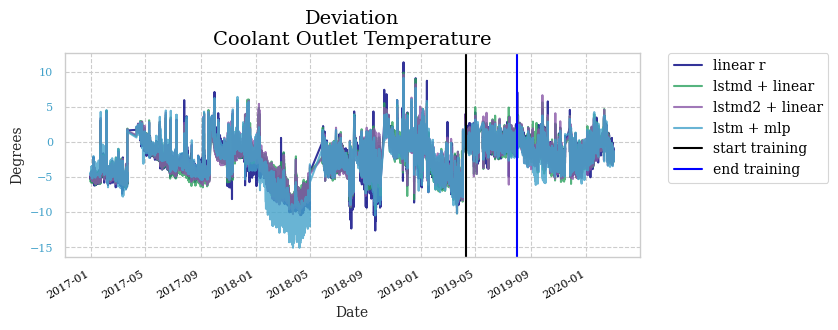

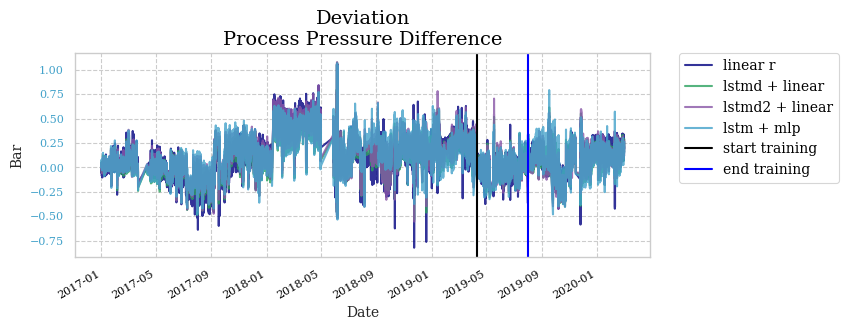

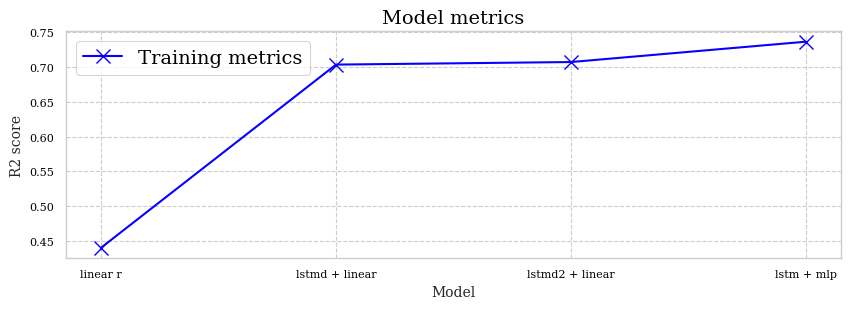

In [8]:
modelList = [
    linear_cv,
    ensemble,
    ensemble2,
	ensemble3,
]

initTrainPredict(modelList)

# Conclusions

It appears the different model architectures all converge towards approximately the same solutions, although with some noticable differences. R2-score is consistent around the interval (0.6, 0.7) for the training data. Predictions during testing show realistic variations.

It is important to note that the convergence results shown here with 10 minute sample rate differ from what has achieved in notebook *features_comparison_lstm* for the same dataset with 30 minute sample rate. For instance, the convergence patterns for the same model architecture are completely different. It is obvious that the same model architecture cannot be expected to work for all datasets, even from the same data source. This suggests that general conclusions cannot be drawn from LSTM models.

# Additional plots

Output for each model is printed separately, for visualization purposes only.

Training model linear r
    Trained weights for linear r:
[[ 0.40514293 -0.0798533  -0.56135528 -0.35160217]
 [ 0.17121011  0.26264951  0.72230129  0.22615566]]


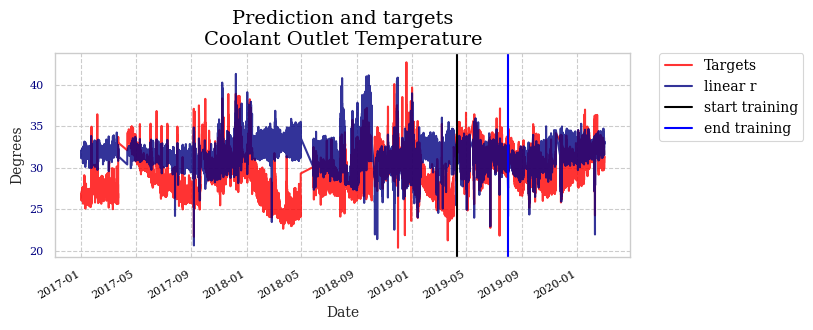

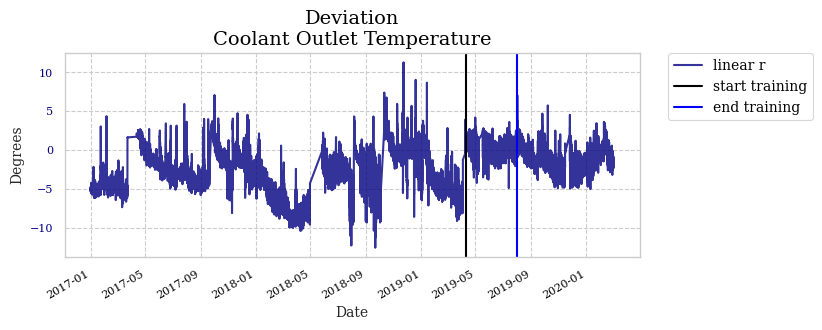

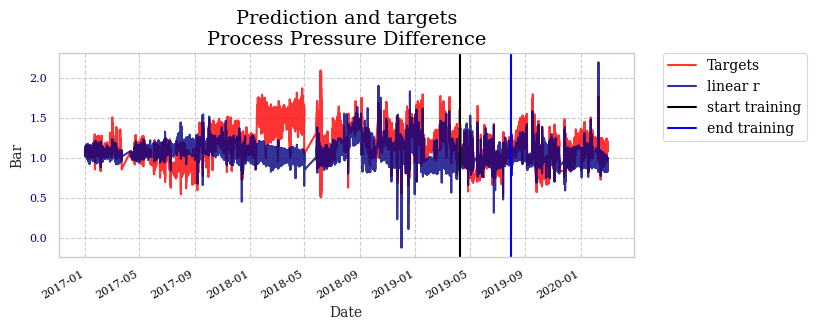

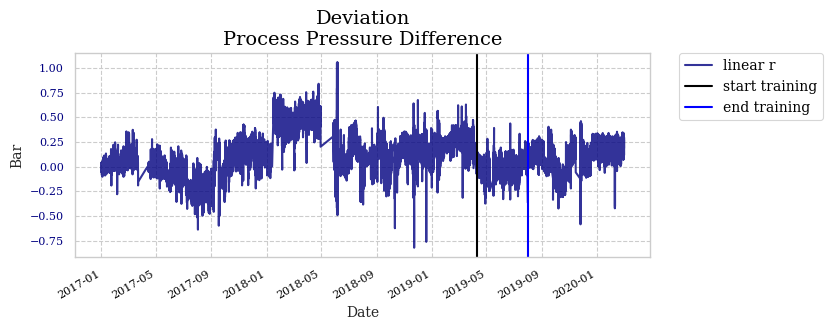

Model lstmd 1x 16 was loaded from file
+-------------+-----------+-------------+---------------+--------+
|    Model    | Min. loss | Chosen loss | Min. val loss | Epochs |
+-------------+-----------+-------------+---------------+--------+
| lstmd 1x 16 |  0.04189  |   0.048115  |    0.290245   |  284   |
+-------------+-----------+-------------+---------------+--------+


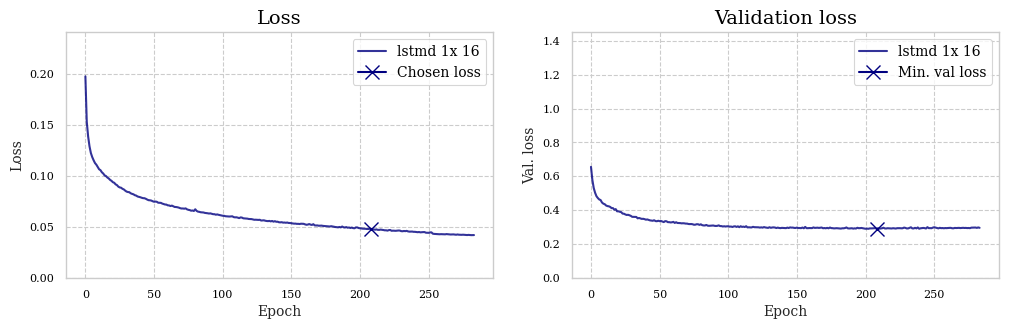

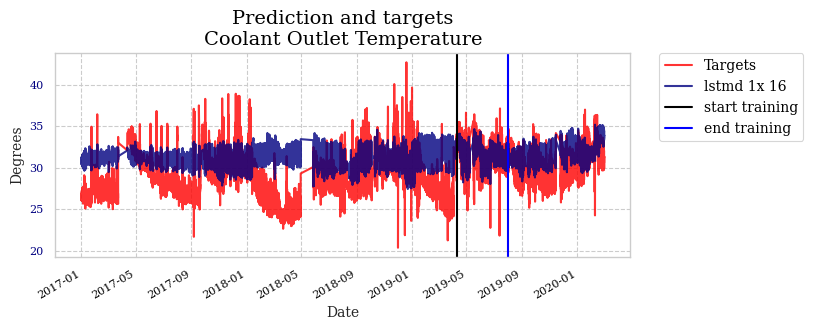

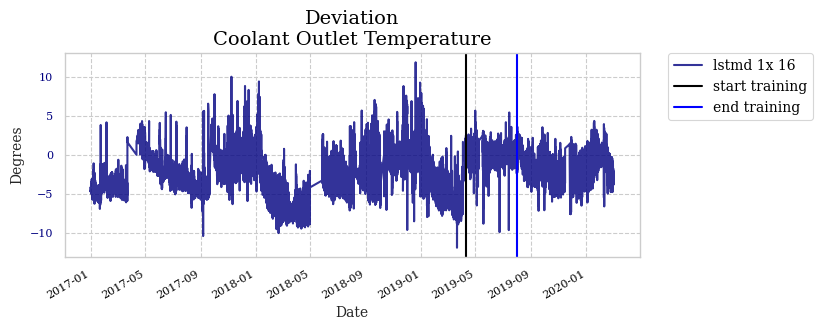

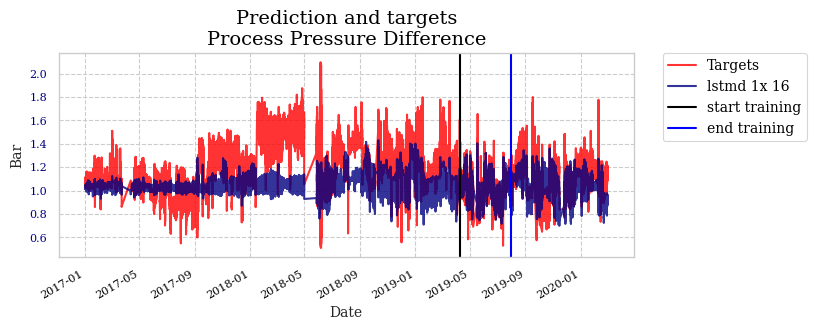

Model lstmd 1x 32 was loaded from file
+-------------+-----------+-------------+---------------+--------+
|    Model    | Min. loss | Chosen loss | Min. val loss | Epochs |
+-------------+-----------+-------------+---------------+--------+
| lstmd 1x 32 |  0.030425 |   0.045124  |    0.288125   |  164   |
+-------------+-----------+-------------+---------------+--------+


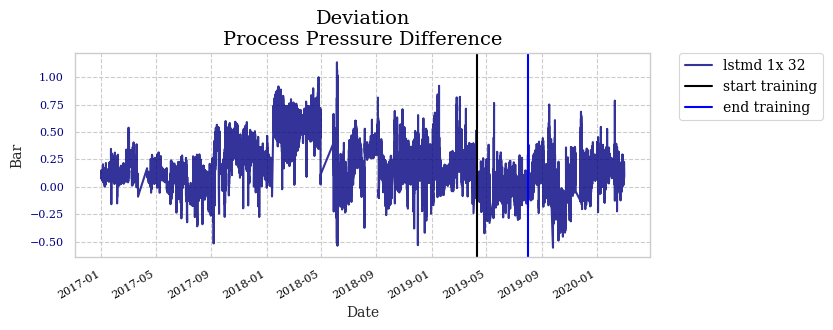

Model lstmd 1x 64 was loaded from file
+-------------+-----------+-------------+---------------+--------+
|    Model    | Min. loss | Chosen loss | Min. val loss | Epochs |
+-------------+-----------+-------------+---------------+--------+
| lstmd 1x 64 |  0.009388 |   0.02772   |    0.261556   |  141   |
+-------------+-----------+-------------+---------------+--------+


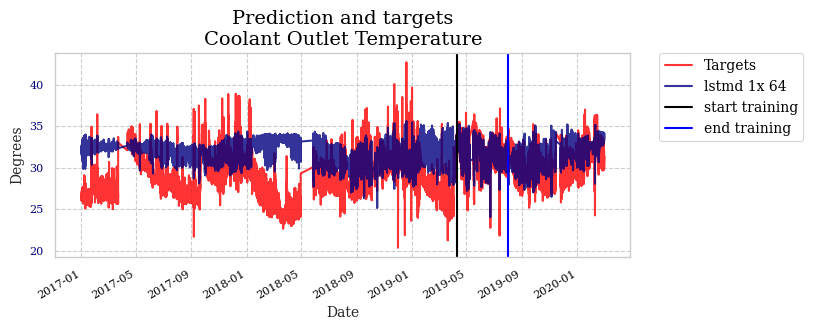

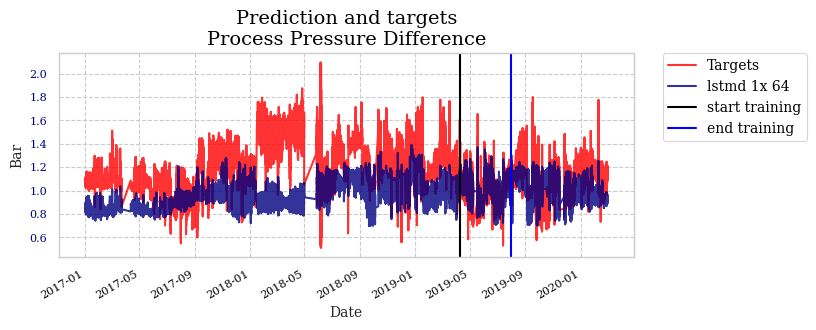

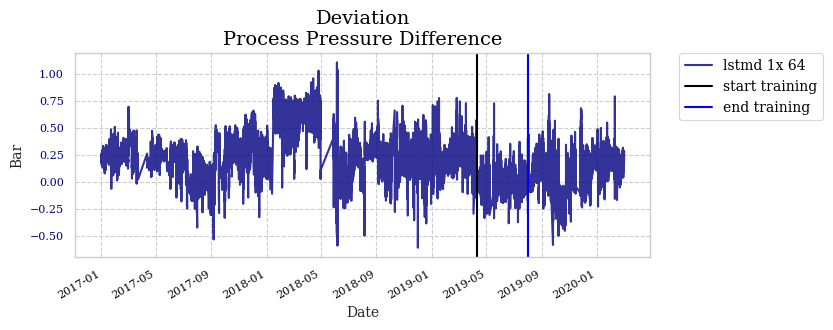

Model lstmd 1x 128 was loaded from file
+--------------+-----------+-------------+---------------+--------+
|    Model     | Min. loss | Chosen loss | Min. val loss | Epochs |
+--------------+-----------+-------------+---------------+--------+
| lstmd 1x 128 |  0.001682 |   0.025673  |    0.251836   |   80   |
+--------------+-----------+-------------+---------------+--------+


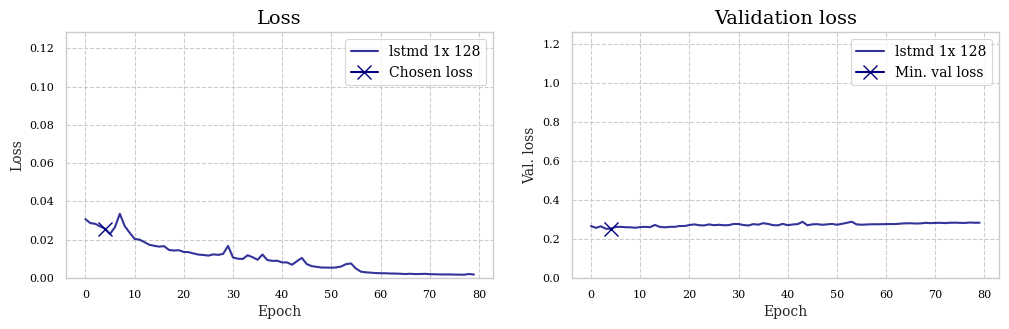

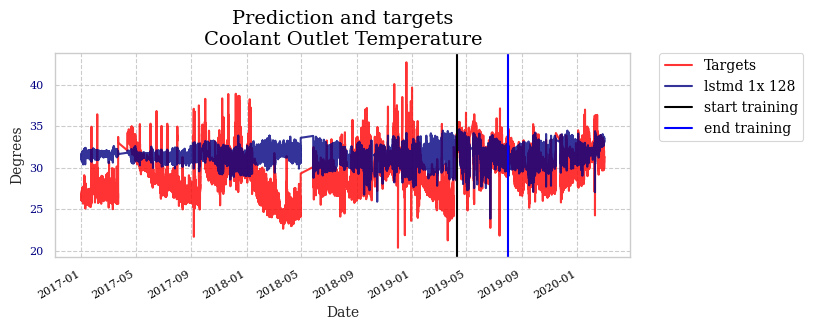

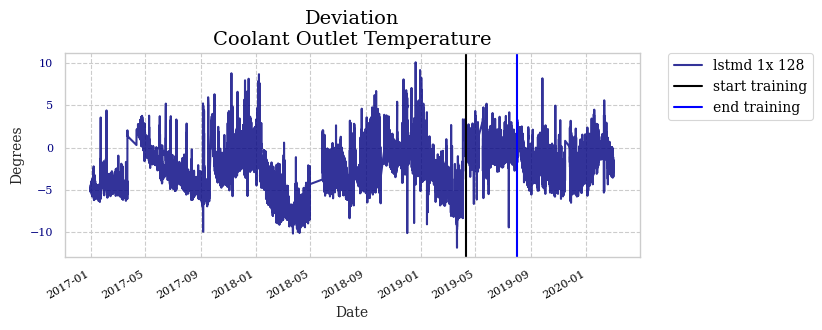

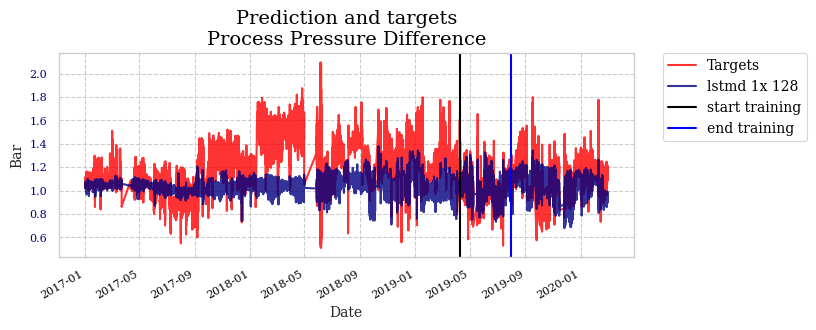

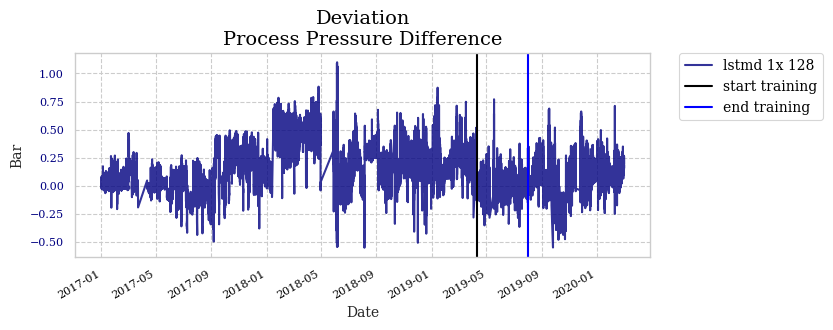

Model lstmd 2x 16 was loaded from file
+-------------+-----------+-------------+---------------+--------+
|    Model    | Min. loss | Chosen loss | Min. val loss | Epochs |
+-------------+-----------+-------------+---------------+--------+
| lstmd 2x 16 |  0.039979 |   0.054809  |    0.316328   |  195   |
+-------------+-----------+-------------+---------------+--------+


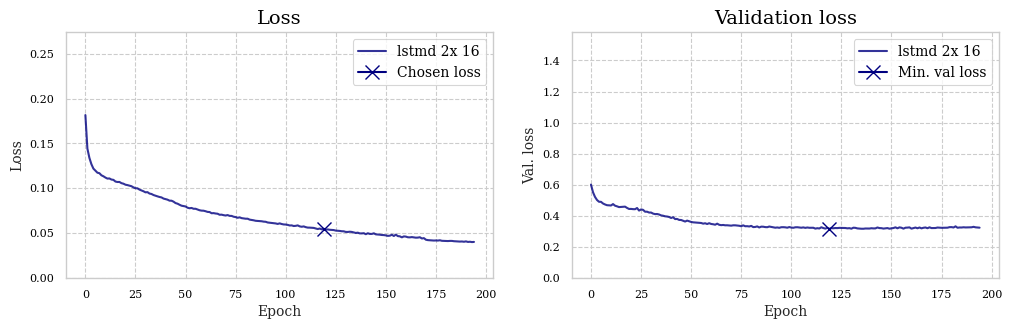

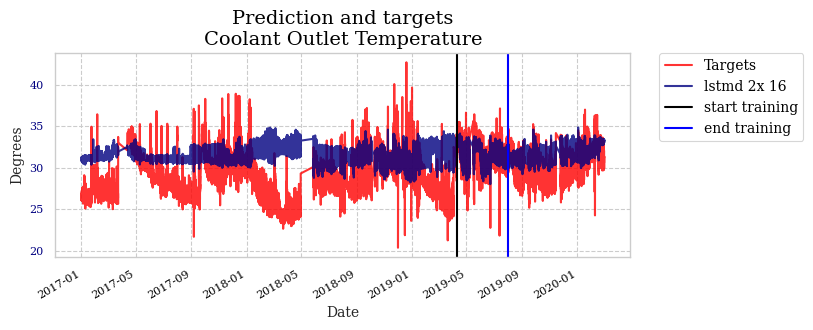

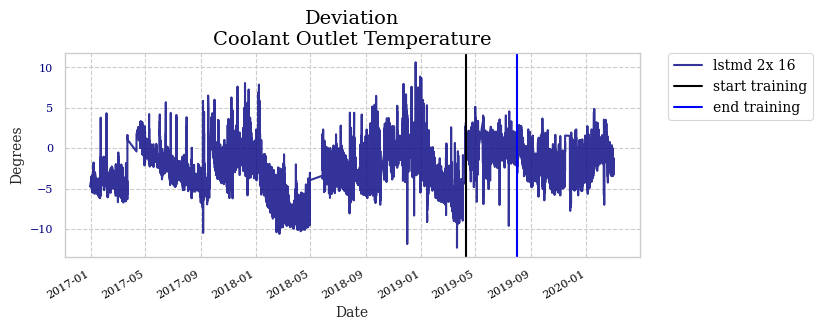

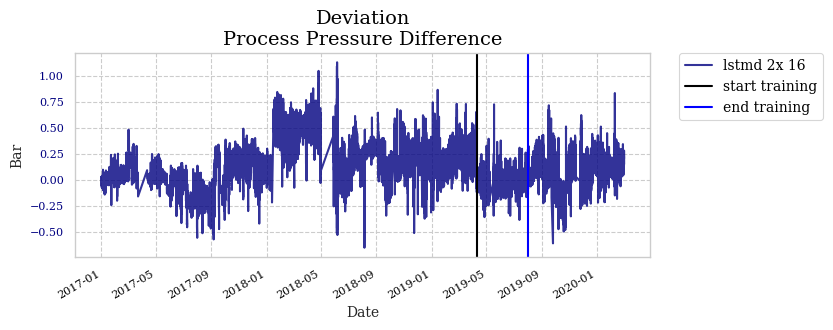

Model lstmd 2x 32 was loaded from file
+-------------+-----------+-------------+---------------+--------+
|    Model    | Min. loss | Chosen loss | Min. val loss | Epochs |
+-------------+-----------+-------------+---------------+--------+
| lstmd 2x 32 |  0.014902 |   0.036102  |    0.27723    |  162   |
+-------------+-----------+-------------+---------------+--------+


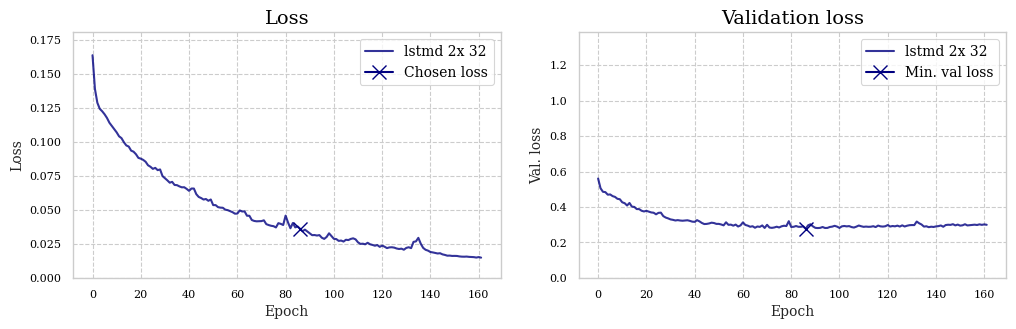

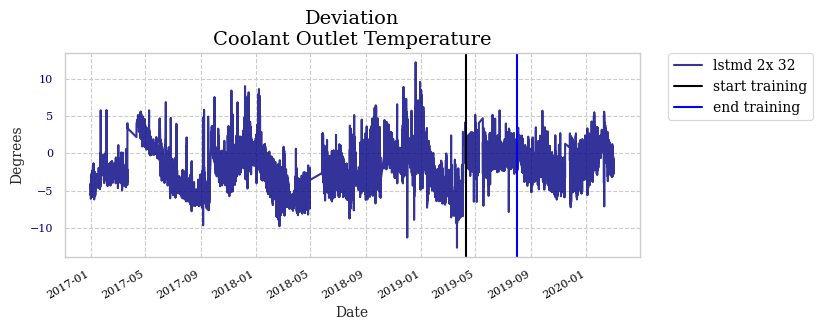

Model lstmd 2x 64 was loaded from file
+-------------+-----------+-------------+---------------+--------+
|    Model    | Min. loss | Chosen loss | Min. val loss | Epochs |
+-------------+-----------+-------------+---------------+--------+
| lstmd 2x 64 |  0.002677 |   0.024856  |    0.25868    |   80   |
+-------------+-----------+-------------+---------------+--------+


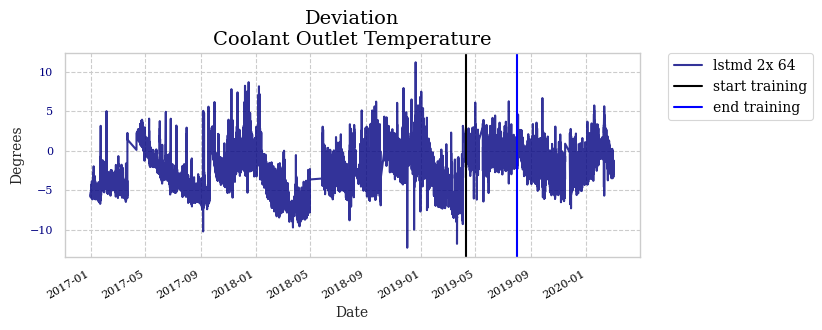

Model lstmd 2x 128 was loaded from file
+--------------+-----------+-------------+---------------+--------+
|    Model     | Min. loss | Chosen loss | Min. val loss | Epochs |
+--------------+-----------+-------------+---------------+--------+
| lstmd 2x 128 |  0.000363 |   0.028581  |    0.249653   |  105   |
+--------------+-----------+-------------+---------------+--------+


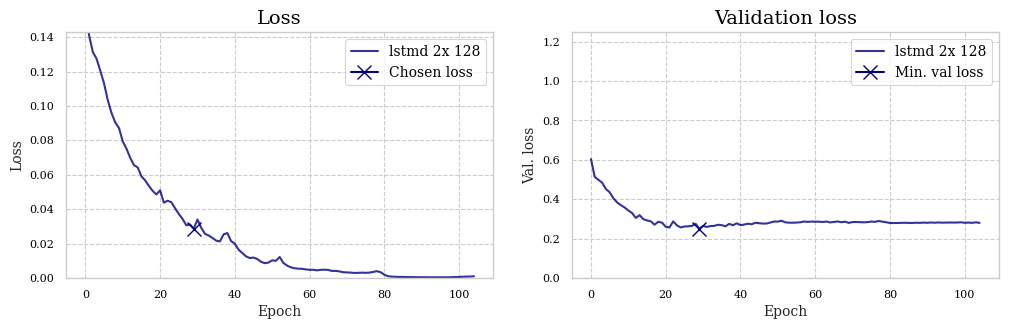

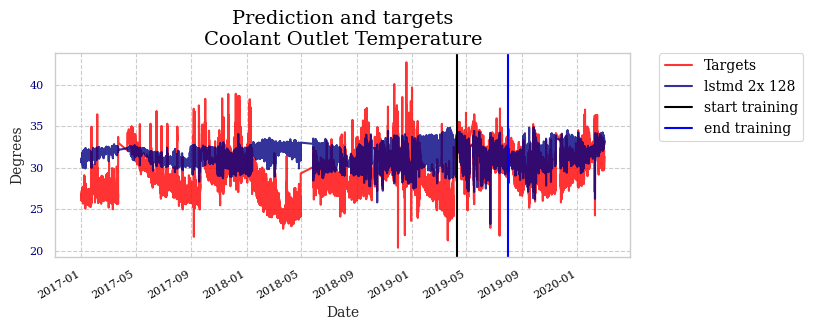

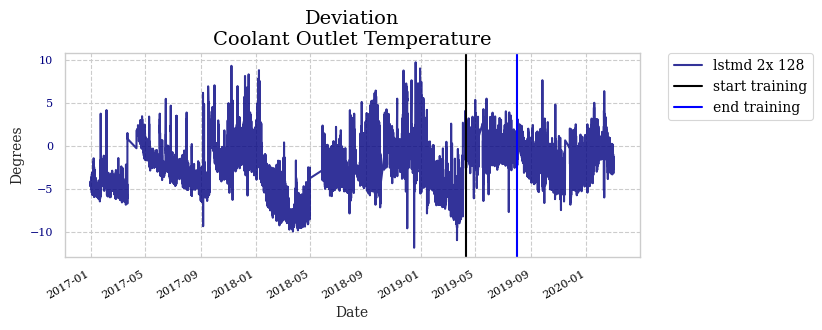

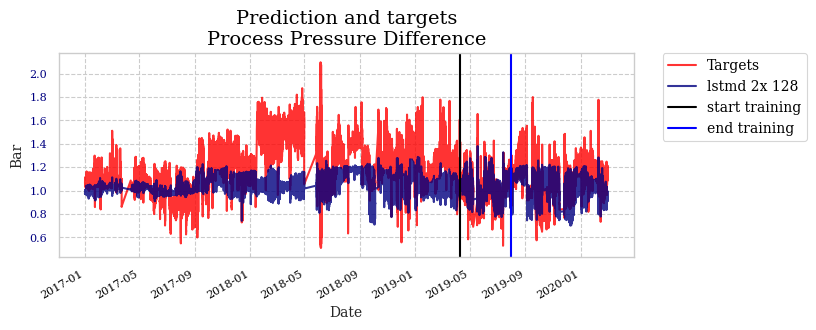

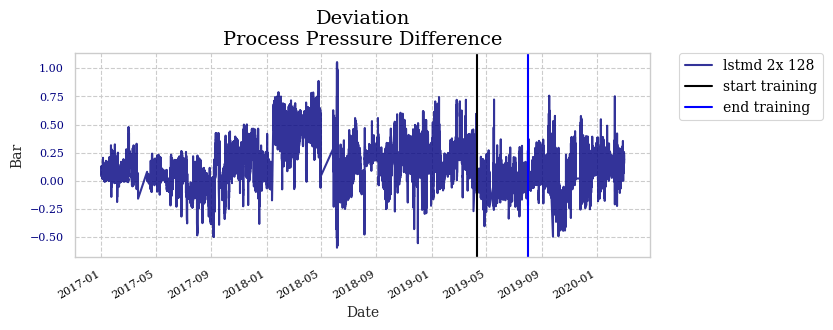

Model lstmd + linear was loaded from file
Training submodel linear r of Ensemble lstmd + linear
    Trained weights for linear r:
[[ 0.40514293 -0.0798533  -0.56135528 -0.35160217]
 [ 0.17121011  0.26264951  0.72230129  0.22615566]]
    Trained weights for Linear model of ensemble:
[[ 0.62859302  0.03018278  0.37704779  0.07516482]
 [-0.05833617  0.60020668  0.06666766  0.33237958]]
+-----------------------------+-----------+-------------+---------------+--------+
|            Model            | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------------------------+-----------+-------------+---------------+--------+
| lstmd + linear, lstmd 2x 64 |  0.002677 |   0.024856  |    0.25868    |   80   |
+-----------------------------+-----------+-------------+---------------+--------+


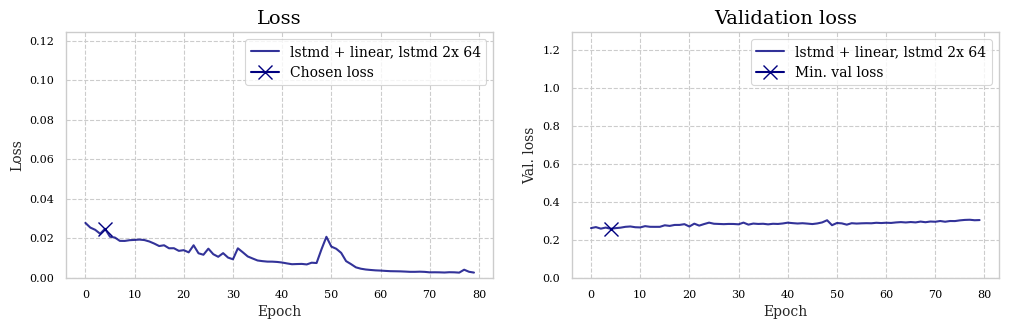

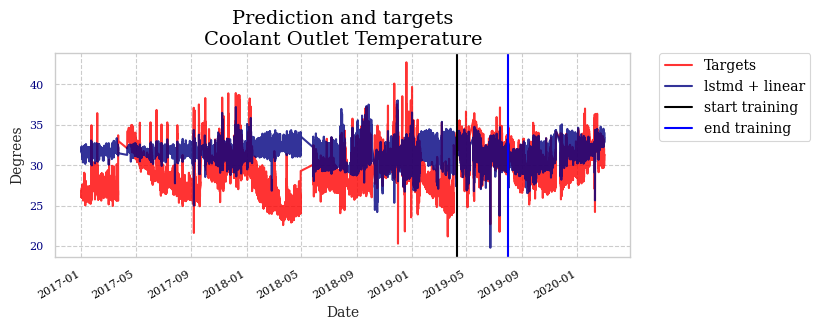

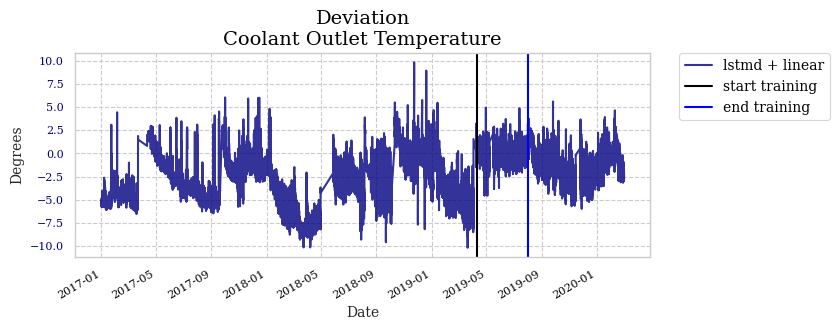

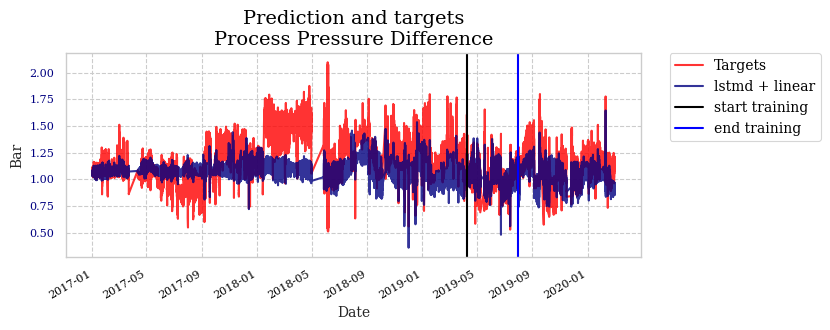

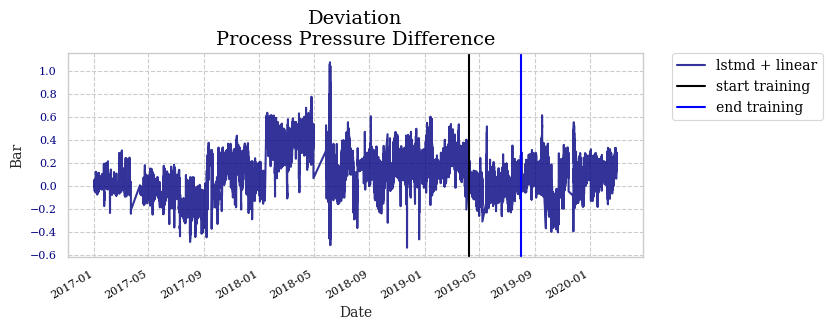

Model lstmd2 + linear was loaded from file
Training submodel linear r of Ensemble lstmd2 + linear
    Trained weights for linear r:
[[ 0.40514293 -0.0798533  -0.56135528 -0.35160217]
 [ 0.17121011  0.26264951  0.72230129  0.22615566]]
    Trained weights for Linear model of ensemble:
[[ 0.66481428  0.04374367  0.34860707  0.08015098]
 [-0.02958362  0.63449827  0.08909955  0.30884218]]
+-------------------------------+-----------+-------------+---------------+--------+
|             Model             | Min. loss | Chosen loss | Min. val loss | Epochs |
+-------------------------------+-----------+-------------+---------------+--------+
| lstmd2 + linear, lstmd 1x 128 |  0.001682 |   0.025673  |    0.251836   |   80   |
+-------------------------------+-----------+-------------+---------------+--------+


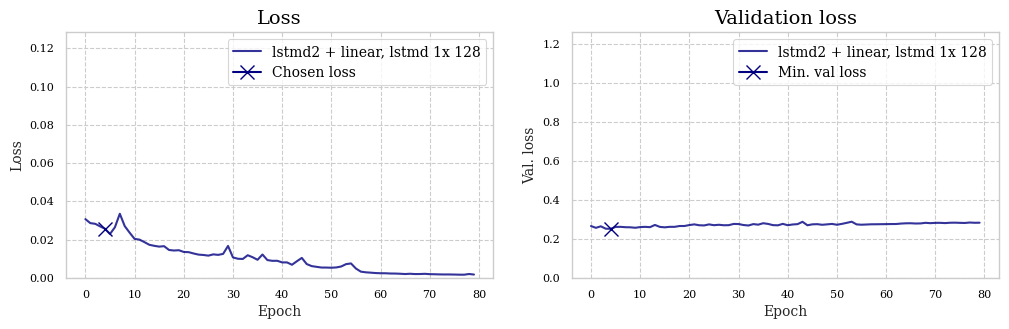

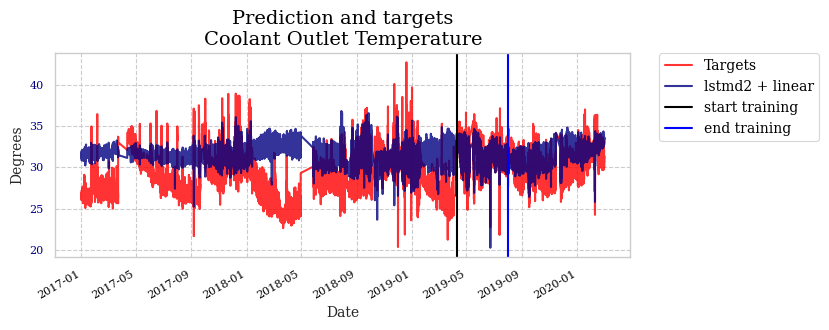

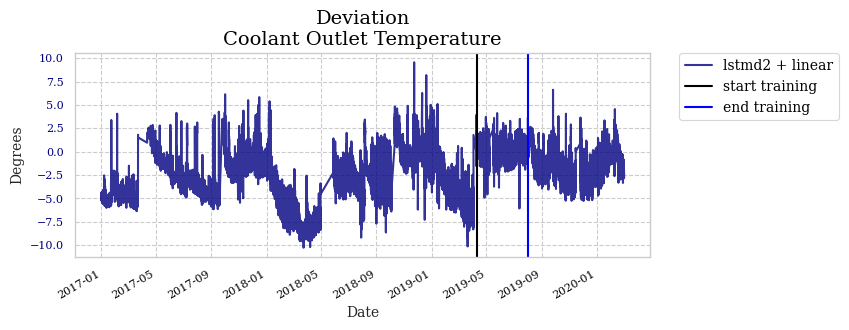

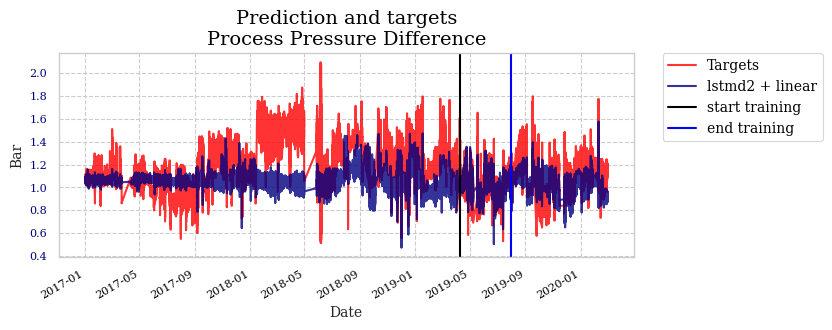

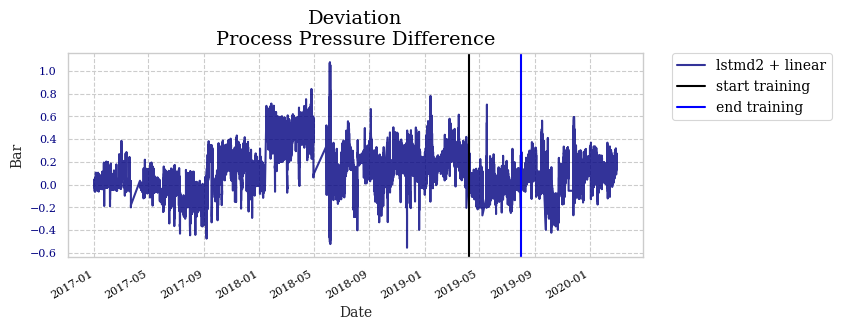

Model lstm + mlp was loaded from file
Model lstm + mlp was loaded from file
    Trained weights for Linear model of ensemble:
[[ 0.34810105 -0.01245636  0.6096715   0.04583973]
 [-0.07080894  0.64650416  0.01235199  0.24515812]]
+------------------------------------+-----------+-------------+---------------+--------+
|               Model                | Min. loss | Chosen loss | Min. val loss | Epochs |
+------------------------------------+-----------+-------------+---------------+--------+
|      lstm + mlp, lstmd 2x 64       |  0.002677 |   0.024856  |    0.25868    |   80   |
| lstm + mlp, mlp for ensemble 2x 64 |  0.263342 |   0.275842  |    1.711555   |  563   |
+------------------------------------+-----------+-------------+---------------+--------+


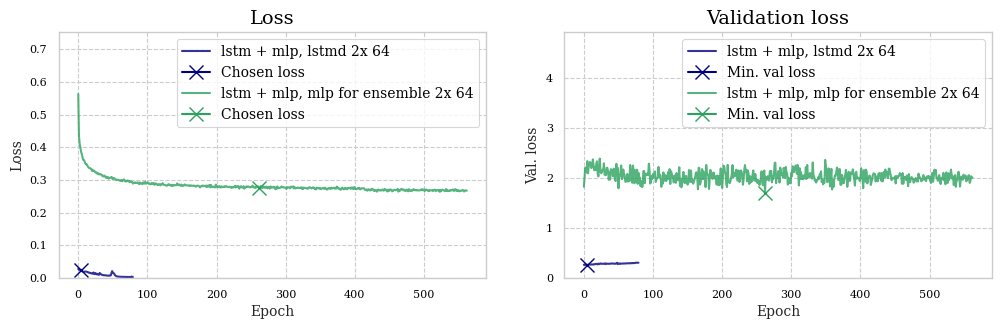

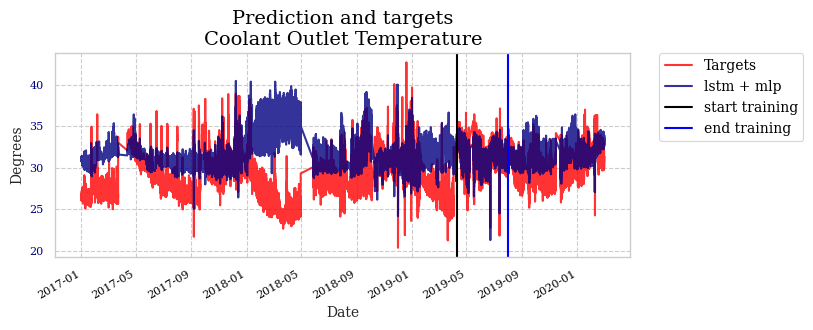

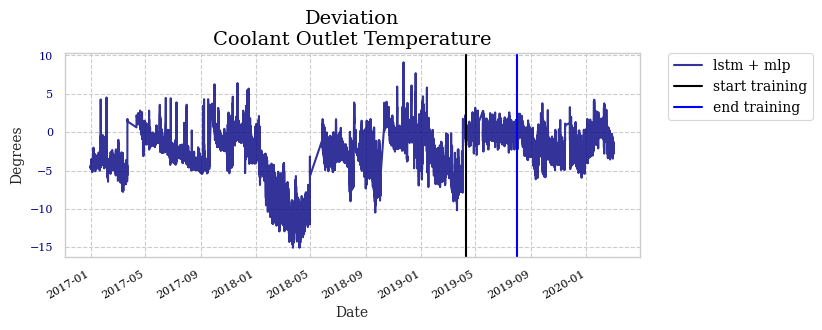

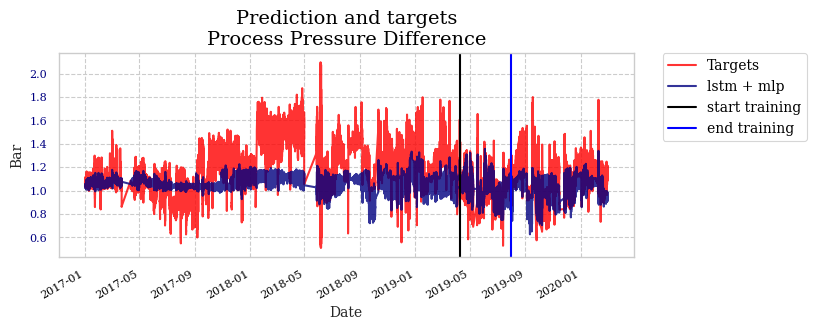

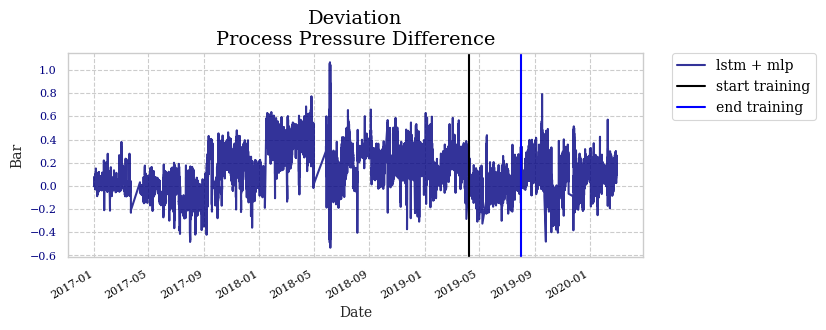

In [9]:
modelList = [
    linear_cv,
    lstmd_1x_16,
    lstmd_1x_32,
    lstmd_1x_64,
    lstmd_1x_128,
    lstmd_2x_16,
    lstmd_2x_32,
    lstmd_2x_64,
    lstmd_2x_128,
    ensemble,
    ensemble2,
	ensemble3,
]

for model in modelList:
    initTrainPredict([model], plot=True, score=False)